# **Regression ML model**

## **1. Load Data**

In [360]:
from sqlalchemy import create_engine
import pandas as pd

# Define the connection string for a trusted connection
conn_str = (
    'mssql+pyodbc://BONCUX\SYNTRA_MEHMET/BelgianMovieSQL?'
    'driver=ODBC+Driver+17+for+SQL+Server&'
    'Trusted_Connection=yes'
)

# Create the SQLAlchemy engine
engine = create_engine(conn_str)

# Establish a connection
connection = engine.connect()

# Example query: Read a table into a pandas DataFrame
query = "Select d.director_name, g.genre, l.language, m.awards_won From MovieDocumentation as f Join dimMovie as m ON m.imdb_id = f.imdb_id Join dimDirector as d ON d.director_list = f.director_list Join dimGenre as g ON g.genre_list = f.genre_list Join dimLanguage as l ON l.lan_list = f.lan_list ORDER BY d.director_name ASC"
df = pd.read_sql(query, connection)

# Print the DataFrame
#print(df)

# Handle missing values
df = df.dropna()

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['director_name', 'genre', 'language'])

# Close the connection explicitly
#connection.close()

# Dispose of the engine
#engine.dispose()

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\mceti\AppData\Local\Temp\ipykernel_4016\3892873243.py:6: SyntaxWarning: invalid escape sequence '\S'
  'mssql+pyodbc://BONCUX\SYNTRA_MEHMET/BelgianMovieSQL?'


## **2. Data Preparation**

### **2.1 Data Separation as X and Y**

In [361]:
y = df['awards_won']
y

0       1
1      12
2       1
3       4
4      13
       ..
504     2
505     1
506     2
507     7
508     2
Name: awards_won, Length: 509, dtype: int64

In [362]:
x = df.drop('awards_won', axis = 1)
x

,director_name_Adil El Arbi,director_name_Agnès Merlet,director_name_Alain Berliner,director_name_Alain Guesnier,director_name_Alain de Halleux,director_name_Alex Stockman,director_name_Alexe Poukine,director_name_Amory,director_name_Amélie van Elmbt,director_name_Anke Blondé,...,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Talk-Show,genre_Thriller,language_Dutch,language_French
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### **2.2 Data Splitting**

In [363]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

## **3. Model Building**

### **3.1 Linear Regression**

#### **3.1.1 Training the model**

In [364]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### **3.1.2 Applying the model to make prediction**

In [365]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
y_lr_test_pred

array([ 3.13482298e+12,  4.60937500e-01,  3.13482298e+12, -3.86718750e-01,
        2.12890625e+00,  5.07812500e-01,  3.13482298e+12,  3.13482298e+12,
        3.13482298e+12,  3.13482298e+12,  3.13482298e+12,  7.52734375e+00,
        9.68750000e-01, -5.07827880e+13,  1.02578125e+01,  3.13482298e+12,
        1.03398438e+01,  3.13482298e+12,  3.13482298e+12,  3.13482298e+12,
        3.13482298e+12,  3.13482298e+12,  9.84375000e-01,  3.13482298e+12,
       -1.86196438e+14, -8.64092936e+13,  3.13482298e+12,  3.13482298e+12,
        3.13482298e+12,  3.13482298e+12,  3.35937500e-01,  3.13482298e+12,
        3.13482298e+12,  1.25000000e+00,  3.13482298e+12,  3.64236230e+13,
        3.84375000e+00,  3.13482298e+12, -5.46875000e-02,  1.97656250e+00,
       -6.38364549e+13,  3.13482298e+12,  3.13482298e+12,  1.17968750e+00,
        3.13482298e+12, -2.89215112e+13,  3.13482298e+12,  1.02499609e+13,
        3.13482298e+12,  3.13482298e+12,  4.96093750e-01,  4.67103530e+13,
        8.10156250e+00,  

#### **3.1.3 Evaluate model performance**

In [366]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [367]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'] 
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,4.439832,0.770093,3103240543513433570709340160.0,-217577546952360124332638208.0


### **3.2 Random Forest**

#### **3.2.1 Training the model**

In [473]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 10, n_estimators= 300, random_state= 30)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10,
                      n_estimators=300, random_state=30)

#### **3.2.2 Applying the model to make prediction**

In [474]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
y_rf_test_pred

array([1.95964781, 1.42726536, 1.89255345, 1.83899652, 1.80175076,
       1.95964781, 2.28385866, 1.874741  , 1.39087514, 1.89255345,
       1.47014377, 3.445698  , 1.46745579, 1.47014377, 5.38602686,
       2.28385866, 2.63910336, 1.47014377, 1.89255345, 2.28385866,
       1.89255345, 1.47014377, 1.47058578, 2.58244242, 2.28385866,
       1.79541942, 1.95964781, 2.28385866, 1.79860262, 1.79860262,
       1.76400377, 1.47014377, 1.89255345, 1.81523923, 2.28385866,
       2.58244242, 2.13975646, 2.28385866, 2.21100884, 1.5102088 ,
       1.95964781, 2.58244242, 2.28385866, 2.22238531, 1.47014377,
       1.92679976, 1.95964781, 1.89255345, 2.28385866, 1.89255345,
       2.1612896 , 2.28385866, 3.62963364, 2.28135165, 1.37503691,
       2.33467535, 2.21507081, 2.28385866, 1.3901766 , 1.95964781,
       1.95964781, 3.14661369, 1.80175076, 5.38602686, 1.89255345,
       1.47014377, 1.88571544, 1.89255345, 1.47049465, 2.21177106,
       1.89255345, 1.47027982, 1.42257655, 2.28385866, 1.95964

#### **3.2.3 Evaluate model performance**

In [475]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [476]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'] 
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,13.318409,0.310334,13.701535,0.039344


### **3.3 Model comparison**

In [477]:
df_models = pd.concat([lr_results, rf_results], axis = 0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,4.439832,0.770093,3103240543513433570709340160.0,-217577546952360124332638208.0
1,Random forest,13.318409,0.310334,13.701535,0.039344


## **4. Data Visualization of Prediction Results**

[]

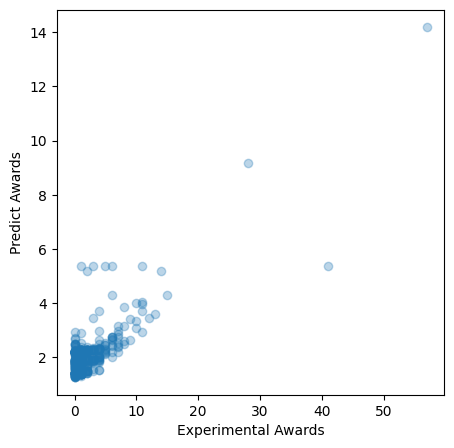

In [478]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_rf_train_pred, alpha=0.3)

#z = np.polyfit(y_train, y_lr_train_pred, 1)
#p = np.polyld(z)

#plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Awards')
plt.xlabel('Experimental Awards')
plt.plot()